In [20]:
#import libraries
import pandas as pd
import numpy as np
import os

In [21]:
path = r'/Users/ryansmitz/Instacart_Basket_Analysis_11_28_23'

In [22]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_merge.pkl'))

In [23]:
df_ords_prods_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7,3.7,both
32404855,31526,202557,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7,3.7,both
32404856,758936,203436,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19,6.9,both
32404857,2745165,203436,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19,6.9,both


In [24]:
#create a subset of the merged dataframe 
df = df_ords_prods_merge[:1000000]

In [25]:
print(df.dtypes)

order_id                     int64
user_id                      int64
order_number                 int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
dtype: object


In [26]:
#change the data type of prices to int64
df.loc[:, 'prices'] = df['prices'].astype('int64')

In [27]:
# create a price label column with a user-defined function
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [28]:
#apply the user-defined function
df['price_range'] = df.apply(price_label, axis=1)

/var/folders/8s/hd59lm_10lz7xmm3phb5dc800000gn/T/ipykernel_14904/3773637766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [29]:
#check the value counts of the new price_range column
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    755080
Low-range product    244920
Name: count, dtype: int64

In [30]:
#get the max of the prices column to find out why no High-range products are found in the new column
df['prices'].max()

14.0

In [31]:
print(df.dtypes)

order_id                     int64
user_id                      int64
order_number                 int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range                 object
dtype: object


In [32]:
#1 apply loc function to create a new column for the entire merged dataframe
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

/var/folders/8s/hd59lm_10lz7xmm3phb5dc800000gn/T/ipykernel_14904/228894647.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High-range product' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [33]:
df_ords_prods_merge.loc[(df_ords_prods_merge['prices'] <= 15) & (df_ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [34]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [35]:
#check the value counts for the entire merged dataframe
df_ords_prods_merge['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21859490
Low-range product     10127691
High-range product      417678
Name: count, dtype: int64

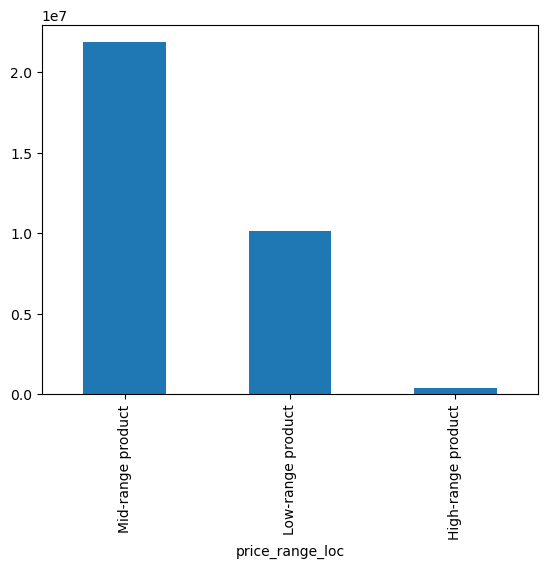

In [36]:
bar = df_ords_prods_merge['price_range_loc'].value_counts().plot.bar()

In [37]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [38]:
#1 create a busiest day of week column using a result set
result = []
for value in df_ords_prods_merge["order_day_of_week"]:
    if value == 0:
        result.append("Saturday")
    elif value == 1:
        result.append("Sunday")
    elif value == 2:
        result.append("Monday")
    elif value == 3:
        result.append("Tuesday")
    elif value == 4:
        result.append("Wednesday")
    elif value == 5:
        result.append("Thursday")
    elif value == 6:
        result.append("Friday")

In [39]:
#assign the result set to a new column
df_ords_prods_merge['order_day_of_week_label'] = result

In [40]:
#count the values in the new order_day_of_week_label column
df_ords_prods_merge['order_day_of_week_label'].value_counts(dropna = False)

order_day_of_week_label
Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: count, dtype: int64

In [41]:
#1 create a busiest day of week label using result set
result = []

for value in df_ords_prods_merge["order_day_of_week_label"]:
  if value == 'Saturday':
    result.append("Busiest day")
  elif value == 'Wednesday':
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [42]:
#1 assign the result set to a new column 'busiest day'
df_ords_prods_merge['busiest_day'] = result

In [43]:
#count the values of the busiest day column
df_ords_prods_merge['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: count, dtype: int64

In [44]:
#check the dataframe visually
df_ords_prods_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Monday,Regularly busy
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Tuesday,Regularly busy
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Tuesday,Regularly busy
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Wednesday,Least busy
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Wednesday,Least busy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7,3.7,both,Low-range product,Monday,Regularly busy
32404855,31526,202557,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7,3.7,both,Low-range product,Thursday,Regularly busy
32404856,758936,203436,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Monday,Regularly busy
32404857,2745165,203436,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Tuesday,Regularly busy


In [45]:
#2 client correction
df_ords_prods_merge.drop('busiest_day', axis=1, inplace=True)

In [46]:
# alter the result set to include client correction 
result = []

for value in df_ords_prods_merge["order_day_of_week_label"]:
  if value == 'Saturday':
    result.append("Busiest day")
  elif value == 'Sunday':
    result.append("Second busiest day")
  elif value == 'Wednesday':
    result.append("Slowest day")
  elif value == 'Tuesday':
    result.append("Second slowest day")
  else:
    result.append("Regularly busy day")

In [47]:
#assign the results set
df_ords_prods_merge['busiest_days'] = result

In [48]:
#check the dataframe visually
df_ords_prods_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Monday,Regularly busy day
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Tuesday,Second slowest day
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Tuesday,Second slowest day
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Wednesday,Slowest day
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Wednesday,Slowest day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7,3.7,both,Low-range product,Monday,Regularly busy day
32404855,31526,202557,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7,3.7,both,Low-range product,Thursday,Regularly busy day
32404856,758936,203436,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Monday,Regularly busy day
32404857,2745165,203436,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Tuesday,Second slowest day


In [49]:
#3 It makes sense that the slowest day would have the lowest count. Regularly busy days beat out busiest day entries because they are comprised of multiple different days combined
df_ords_prods_merge['busiest_days'].value_counts(dropna = False)

busiest_days
Regularly busy day    12916111
Busiest day            6204182
Second busiest day     5660230
Second slowest day     3840534
Slowest day            3783802
Name: count, dtype: int64

In [50]:
#4 check for the busiest hours of the day
df_ords_prods_merge['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [51]:
#4 create a label column to classify by how how busy each day is
df_ords_prods_merge.loc[df_ords_prods_merge['order_hour_of_day'].isin([10,11,14,15,13,12,16,9]), 'busiest_period_of_day'] = 'Most_orders'

/var/folders/8s/hd59lm_10lz7xmm3phb5dc800000gn/T/ipykernel_14904/2328503178.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Most_orders' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_prods_merge.loc[df_ords_prods_merge['order_hour_of_day'].isin([10,11,14,15,13,12,16,9]), 'busiest_period_of_day'] = 'Most_orders'


In [52]:
df_ords_prods_merge.loc[df_ords_prods_merge['order_hour_of_day'].isin([17,8,18,19,20,7,22,21]), 'busiest_period_of_day'] = 'Average_orders'

In [53]:
df_ords_prods_merge.loc[df_ords_prods_merge['order_hour_of_day'].isin([23,6,0,1,5,2,4,3]), 'busiest_period_of_day'] = 'Fewest_orders'

In [54]:
#check the new column visually by viewing the entire dataframe
df_ords_prods_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Monday,Regularly busy day,Average_orders
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Tuesday,Second slowest day,Average_orders
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Wednesday,Slowest day,Average_orders
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Wednesday,Slowest day,Most_orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7,3.7,both,Low-range product,Monday,Regularly busy day,Most_orders
32404855,31526,202557,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7,3.7,both,Low-range product,Thursday,Regularly busy day,Most_orders
32404856,758936,203436,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Monday,Regularly busy day,Average_orders
32404857,2745165,203436,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Tuesday,Second slowest day,Fewest_orders


In [55]:
#5 view the frequency for this column
df_ords_prods_merge['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most_orders       21118071
Average_orders     9997651
Fewest_orders      1289137
Name: count, dtype: int64

In [56]:
#7 export dataframe
df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ords_prods_merge_2.pkl'))